<a href="https://colab.research.google.com/github/Supreeta11/CodeClause_credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection** 

# **Importing Libraries**

In [73]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data Preprocessing**

In [74]:
# Reading the dataset
df = pd.read_csv('/content/creditcard.csv.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.shape

(284807, 31)

In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Handle Missing Values**

In [28]:
# Cheking missing values in columns
df_missing_values = df.isnull().sum()
df_missing_values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Data distribution Analysis**




In [75]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

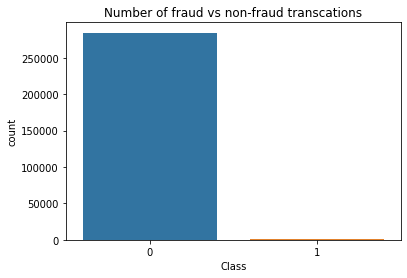

In [76]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

## **Outliers treatment**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

#### **distribution of classes with time**

In [77]:
# Creating fraud dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraud dataframe
data_non_fraud = df[df['Class'] == 0]

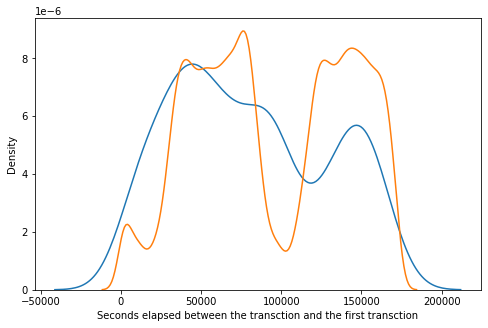

In [78]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudt',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraud',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### **Analysis**
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [79]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

## **distribution of classes with amount**

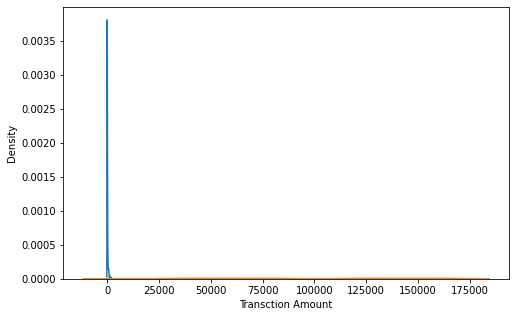

In [80]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

### **Analysis**
We can see that the fraud transctions are mostly densed in the lower range of amount, whereas the non-fraud transctions are spreaded throughout low to high range of amount. 

In [81]:
# Import library
from sklearn.model_selection import train_test_split

In [82]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [83]:
# Putting target variable to y
y = df['Class']

In [84]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## **Feature Scaling**
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [85]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [86]:
# Instantiate the Scaler
scaler = StandardScaler()

In [87]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [88]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


### **Scale the test set**


In [89]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


# **Models**

In [90]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [91]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [92]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## **Logistic regression**

In [93]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [94]:
# Instantiate the model with best C
logistic = LogisticRegression(C=0.01)

In [95]:
# Fit the model on the train set
logistic_model = logistic.fit(X_train, y_train)

In [96]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

## **Prediction results**

------------------ Confusion Matrix --------------------
[[56852    14]
 [   44    52]]


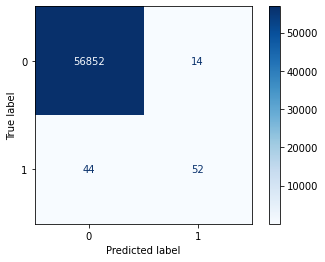

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.54      0.64        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9989817773252344
Sensitivity:- 0.5416666666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.6419753086419753
------------------ ROC --------------------


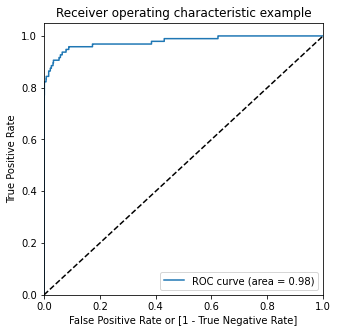

In [97]:
display_test_results("Logistic Regression", logistic_model)

**We can see that we have very good ROC on the test set 0.98, which is almost close to 1.**

## **XGBoost**

In [98]:
# Importing XGBoost
from xgboost import XGBClassifier

In [99]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}


In [101]:
# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

## **Prediction results**

------------------ Confusion Matrix --------------------
[[56852    14]
 [   23    73]]


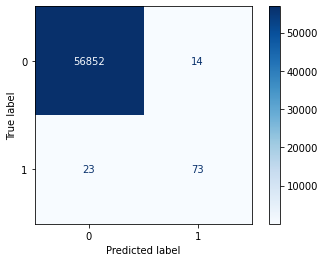

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9993504441557529
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.7978142076502732
------------------ ROC --------------------


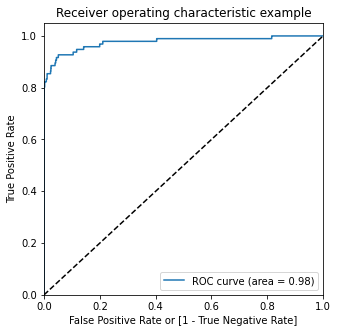

In [102]:
display_test_results("XG Boost", xgb_model)

# **Decision Tree**

In [103]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
# Model with optimal hyperparameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

### **Prediction results**

------------------ Confusion Matrix --------------------
[[56836    30]
 [   40    56]]


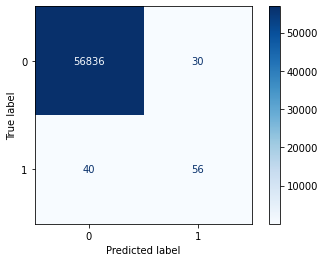

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.6153846153846155
------------------ ROC --------------------


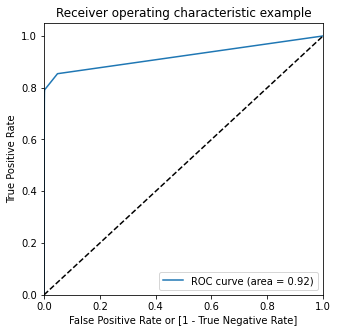

In [105]:
display_test_results("Decision Tree", decision_tree_model)

### **Random Forest**

In [108]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [111]:
# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

### **Prediction results**

------------------ Confusion Matrix --------------------
[[56845    21]
 [   34    62]]


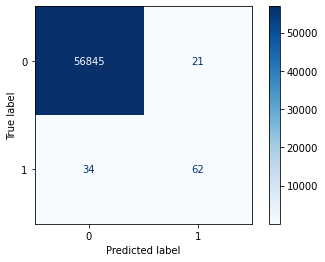

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.75      0.65      0.69        96

    accuracy                           1.00     56962
   macro avg       0.87      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9990344440153085
Sensitivity:- 0.6458333333333334
Specificity:- 0.999630710793796
F1-Score:- 0.6927374301675977
------------------ ROC --------------------


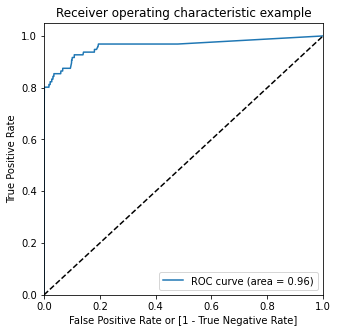

In [71]:
display_test_results("Random Forest", random_forest_model)

## **Summary**

In [72]:
results.sort_values(by="ROC", ascending=False)

,Model Name,Accuracy,F1-score,ROC
0,Logistic Regression,0.998982,0.641975,0.977696
1,XG Boost,0.999350,0.797814,0.976238
3,Random Forest,0.999034,0.692737,0.961502
2,Decision Tree,0.998771,0.615385,0.921750
